## Hotel Booking Demand - EDA Project

This project is dedicated to the **"Exploratory Data Analysis" (EDA)** and explore the data given in Hotel Booking Demand.csv file.  
This data set contains booking information for 2 hotels, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.  

In order to perform EDA and understand the dataset, we will use following set of questions to guide in this process:  
1. How many hotels are present in the dataset and how many bookings are mentioned?  
2. What is the cancellation rate for them?  
3. What are the price ranges for each hotel?  
4. What kind of rooms are available in each hotel and their prices?  
5. Which is busiest month of booking?   
6. Which is the best Market for booking and through which agent maximum bookings are done?
7. From which country the guests are coming?  
8. What are types of guests are booking in these hotels?

Let the analysis begin by importing required set of libraries

In [1]:
# Importing the basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the csv file from Kaggle
df_hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
# View complete data
df_hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Exploratory Data Analysis (EDA)
#### This technique refers to exploring the given data to understand the relations within the columns and visualizing it. 

In [4]:
# Check the data types
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

From above information, we figured there are total 119390 entries and 32 columns.  
After a quick scan of the available columns, following columns should be studied thoroughly and their correlation should be checked with respect to each other as well as with the cancellations.  
1. Hotel
2. Price (adr)
3. Room Type
4. Arrival Month
5. Stay in weekday night
6. Stay in weedend night
7. Lead Time
8. Market Segment
9. Agent
10. Customer Type
12. Country
  
First, let's study each column, visualize it and according to the correlation between them, check the machine learning technique which will provide best estimate of a booking cancellation.

### First step here will be to clean the data and fill missing values

In [6]:
# Check for missing values
df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Fill up the missing values
# Children: If not present that means no children are there, so 0.
# Country: If null that means it is 'Unknown'
# Agent / Company: If no agent and company that means the booking is private and hence code 0

df_hotel.fillna({'children':0.0, 'country':'unknown', 'agent':0.0, 'company':0.0}, inplace=True)

No missing data..!!! Now, we will go ahead for duplicated entries

In [8]:
# Display duplicate entries
print(len(df_hotel[df_hotel.duplicated()]))

31994


In [9]:
# Let's drop the duplicated entries
df_hotel.drop_duplicates(inplace=True)
df_hotel.shape

(87396, 32)

In [10]:
# Check statistics for each columns
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Let's visualize correlation between these columns and check how they are related to each other

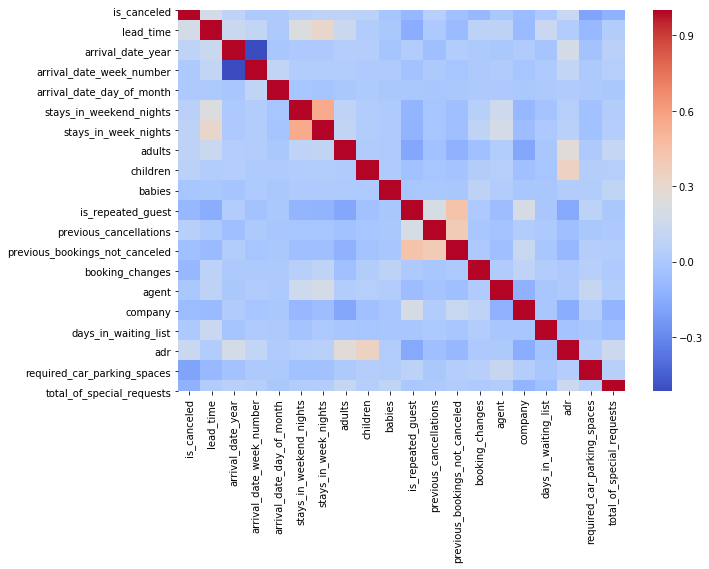

In [79]:
fig,axes = plt.subplots(1,1,figsize=(10,7))

sns.heatmap(df_hotel.corr(), cmap='coolwarm', linecolor='white')

plt.show()

### Hotel

In [11]:
df_hotel['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

'City Hotel' has more number of customers visiting than 'Resort Hotel'

### Lead_time

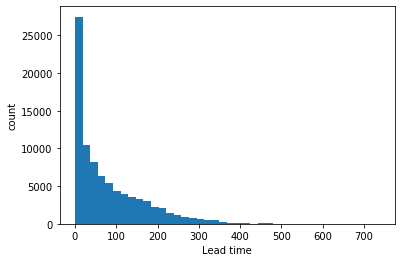

In [13]:
# let's see how many days before the booking is done usually by the customers
plt.hist(df_hotel['lead_time'], bins=40)
plt.xlabel('Lead time')
plt.ylabel('count')
plt.show()

Here, we can see that the book

### is_canceled

In [14]:
# Next column 'is_canceled'.
df_hotel['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

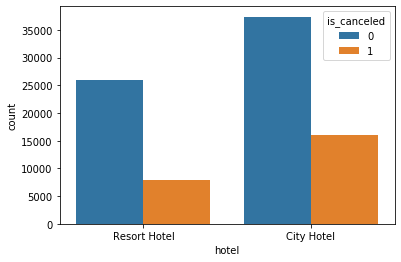

In [15]:
# Let's visualize the count of the 2 hotels on barchart along with the cancellation rate
sns.countplot('hotel', data=df_hotel, hue='is_canceled')

In [16]:
# Now let's see how m any cancellations are received by each hotel
df_hotel.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100

hotel         is_canceled
City Hotel    0              69.961443
              1              30.038557
Resort Hotel  0              76.519077
              1              23.480923
Name: is_canceled, dtype: float64

So, there are **30% cancellations for 'City Hotel'** while only **23.48% for 'Resort Hotel'**

### Average Daily Price (adr) 
Price of the hotel room is one of the biggest factor in deciding whether the person will book it or not and these prices keep changing with the season in year.  
Here, we will see the prices for both hotels in each month of the year.

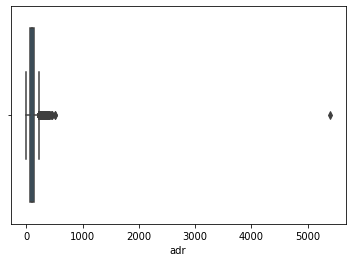

In [17]:
# Let us view the average daily price per day per customer. Here, we will consider that the hotels do not charge
# any room cost for babies
sns.boxplot(df_hotel['adr'])

From above boxplot, we can see one outlier.  
This graph explians that all the price ranges are way below 1000 and only one of the price is above 5000. Now this is can human error while reading the price.
Let us remove the outlier where the price is too high

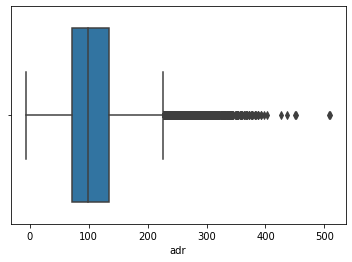

In [18]:
df_hotel.drop(df_hotel[df_hotel['adr']>5000].index, axis=0, inplace=True)
sns.boxplot(df_hotel['adr'])

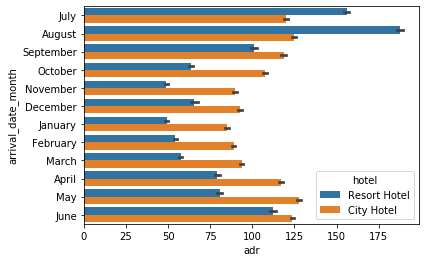

In [19]:
# Prices round the year
sns.barplot(x='adr', y='arrival_date_month', data=df_hotel, hue='hotel')

From above plot, it is observed that the price range for 'Resort Hotel' varies a lot while this variation is less for 'City Hotel'.  
Maybe, because of these variations, total number of customers for 'Resort Hotel' is less than 'City Hotel'.  

### Stay in Week nights v/s Stay in Weekend nights
As we saw that maximum bookings are done during summer time. Let's try to see whether the bookings are done for weekdays or weekends

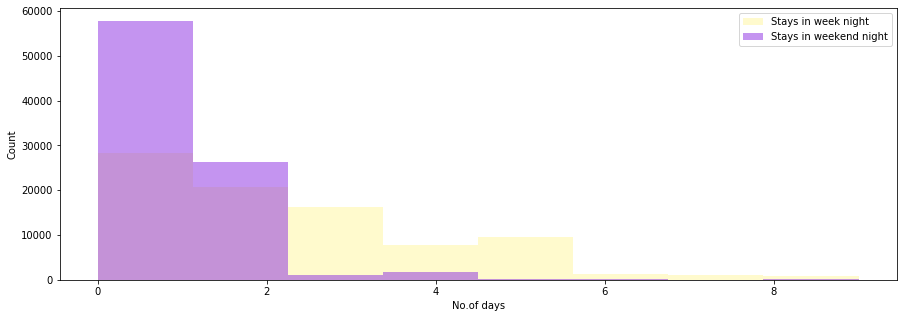

In [20]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

plt.hist(df_hotel['stays_in_week_nights'][df_hotel['stays_in_week_nights'] < 10].dropna(), 
         bins=8,alpha = 1,color = 'lemonchiffon',label='Stays in week night' )

plt.hist(df_hotel['stays_in_weekend_nights'][df_hotel['stays_in_weekend_nights'] < 10].dropna(),
         bins=8, alpha = 0.5,color = 'blueviolet',label='Stays in weekend night' )

plt.xlabel('No.of days')
plt.ylabel('Count')
plt.legend(loc=1)
plt.show()

Here, we can say that maximum bookings are received for weekends and the stay length is between 0 to 2 nights

### Average Daily Price with respect to the room type
Now, price of any room won't only depend on season, but also on the type of room offered.  
So, let's see the price according to the room type

In [21]:
df_price = df_hotel.groupby('reserved_room_type')['adr'].agg({'Average_price':'mean', 'No. of bookings':'size'})
df_price.reset_index(inplace=True)
df_price

C:\Users\mdesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,reserved_room_type,Average_price,No. of bookings
0,A,92.203957,56551
1,B,90.377878,999
2,C,160.561770,915
3,D,122.077545,17398
4,E,125.936130,6049
5,F,168.272310,2823
6,G,176.727904,2052
7,H,188.763993,596
8,L,124.666667,6
9,P,0.000000,6


Text(0.5, 1.0, 'Number of booking for each room')

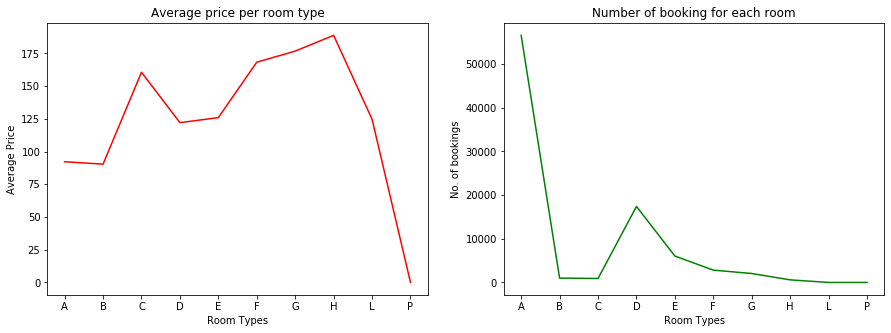

In [22]:
fig,ax = plt.subplots(1, 2, figsize=(15,5))

# Plot 1 for checking average price per room
ax[0].plot(df_price['reserved_room_type'], df_price['Average_price'], color='red')
ax[0].set_xlabel('Room Types')
ax[0].set_ylabel('Average Price')
ax[0].set_title('Average price per room type')

# Plot 2 for checking number of bookings
ax[1].plot(df_price['reserved_room_type'], df_price['No. of bookings'], color='green')
ax[1].set_xlabel('Room Types')
ax[1].set_ylabel('No. of bookings')
ax[1].set_title('Number of booking for each room')

From first plot, we can understand that hotel room type 'H' is the costliest and the room type 'P' is the cheapest.  
While from second plot, it is very clear that room type 'A' is booked the most while room type 'P' is least selected.  

### Market Segment
Let's see how many market segments are booking in these hotels

In [23]:
df_hotel['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13888
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

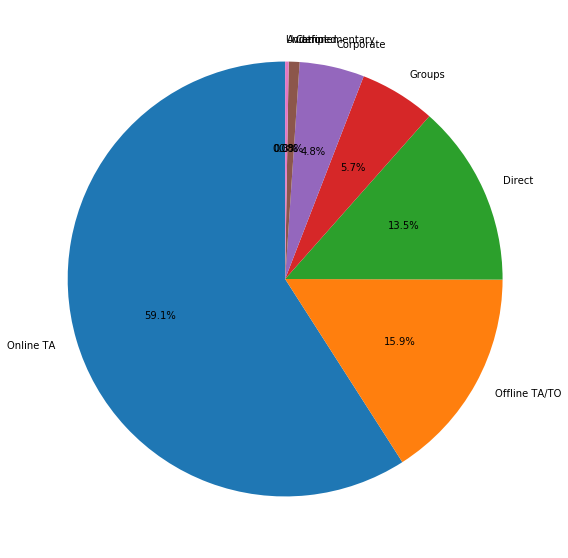

In [24]:
# Let's visualize the market segment in a pie chart
fig = plt.figure(figsize=(10,10))

market_size = df_hotel['market_segment'].value_counts().tolist()
labels = df_hotel['market_segment'].value_counts().index.tolist()

plt.pie(market_size, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

So, most of the bookings (almost 59%) is done through Online TA and after that it is offline.  
Let's see which agent has booked maximum booking in these hotels.

### Agent

In [25]:
# Check count of Agents 
agent_list = list(df_hotel['agent'].value_counts().index)
print(agent_list)
print('Total number of agents in list: ', len(agent_list))

[9.0, 240.0, 0.0, 14.0, 7.0, 250.0, 241.0, 28.0, 8.0, 1.0, 6.0, 40.0, 314.0, 242.0, 83.0, 85.0, 243.0, 171.0, 27.0, 3.0, 22.0, 11.0, 15.0, 196.0, 177.0, 96.0, 138.0, 37.0, 16.0, 229.0, 5.0, 10.0, 21.0, 42.0, 115.0, 26.0, 156.0, 175.0, 195.0, 86.0, 273.0, 251.0, 134.0, 143.0, 298.0, 152.0, 168.0, 315.0, 19.0, 12.0, 2.0, 147.0, 95.0, 410.0, 20.0, 146.0, 142.0, 30.0, 94.0, 330.0, 89.0, 29.0, 52.0, 191.0, 69.0, 159.0, 36.0, 13.0, 17.0, 464.0, 39.0, 75.0, 132.0, 339.0, 38.0, 98.0, 185.0, 118.0, 253.0, 34.0, 220.0, 531.0, 234.0, 208.0, 181.0, 157.0, 184.0, 56.0, 91.0, 58.0, 155.0, 104.0, 71.0, 436.0, 79.0, 468.0, 127.0, 248.0, 87.0, 467.0, 261.0, 68.0, 306.0, 281.0, 394.0, 479.0, 45.0, 119.0, 121.0, 44.0, 201.0, 47.0, 493.0, 149.0, 173.0, 154.0, 527.0, 57.0, 66.0, 153.0, 440.0, 334.0, 336.0, 434.0, 375.0, 128.0, 67.0, 308.0, 35.0, 262.0, 327.0, 290.0, 88.0, 103.0, 77.0, 254.0, 4.0, 423.0, 348.0, 249.0, 368.0, 82.0, 425.0, 390.0, 23.0, 99.0, 183.0, 385.0, 474.0, 187.0, 332.0, 151.0, 502.0, 63

There are total 334 agents available for booking in these hotels. Let us see who has done maximum bookings

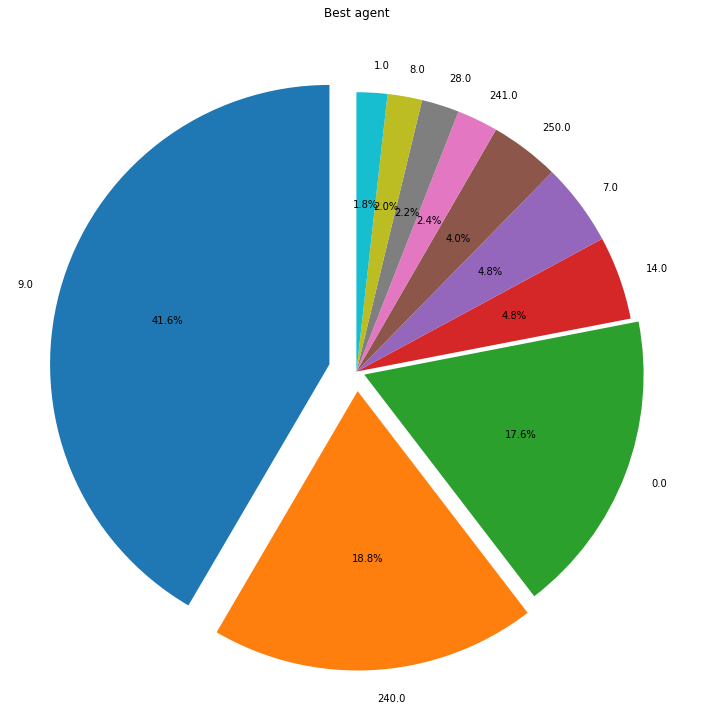

In [64]:
# Let's see which are the top 10 agents who are responsible for booking in these hotels
fig = plt.figure(figsize=(10,10))

# Values to be seen
bookings = df_hotel['agent'].value_counts().tolist()
agent_list = df_hotel['agent'].value_counts().index.tolist()

# Pop out top 3 agents with maximum bookings
explode = (0.10,0.07,0.03,0,0,0,0,0,0,0)

plt.pie(bookings[:10], labels=agent_list[:10], explode=explode, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.title('Best agent')

plt.show()

Here, we can see that maximum bookings are done by Agent number '9.0' and he holds 42.3% of total bookings

### Countries
Let's see from which countries the customers are visiting

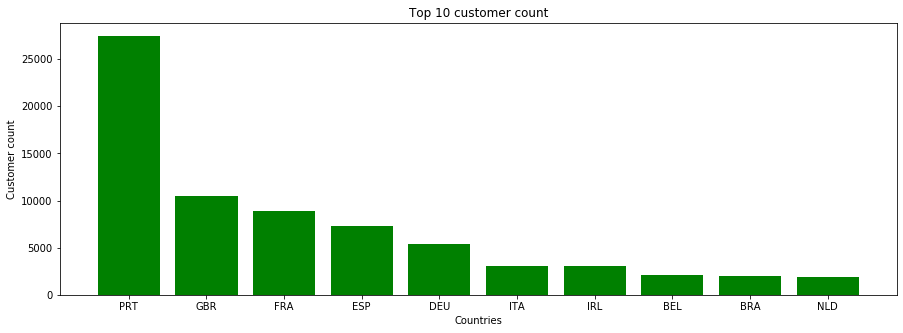

In [67]:
# Print the top 10 count
fig = plt.figure(figsize=(15,5))

x = df_hotel['country'].value_counts().index[:10]
y = df_hotel['country'].value_counts()[:10]

plt.bar(x,y, color='green')
plt.xlabel('Countries')
plt.ylabel('Customer count')
plt.title('Top 10 customer count')

plt.show()

So, people from Portugal are visiting the hotels more than any other country

### Customer Type

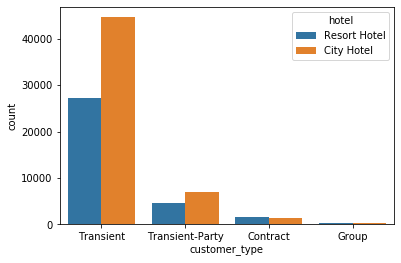

In [72]:
# Chekc which type of customers are visiting 

sns.countplot(df_hotel['customer_type'], hue=df_hotel['hotel'], order=df_hotel['customer_type'].value_counts().index)